### Imports de bibliotecas

In [1]:
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import time  

import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

from imblearn.over_sampling import SMOTE 
from collections import Counter
from sklearn.datasets import make_classification
from numpy import where

### Importação de dados

In [2]:
#Benign, DDoS, Infiltration
directory = 'data/'

attack_df = {}

attack_df[0] = pd.read_csv(directory+'Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')
# attack_df[1]= pd.read_csv(directory+'Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv')
# attack_df[2] = pd.read_csv(directory+'Friday-WorkingHours-Morning.pcap_ISCX.csv')
# attack_df[3] = pd.read_csv(directory+'Monday-WorkingHours.pcap_ISCX.csv')
# attack_df[4] = pd.read_csv(directory+'Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv')
# attack_df[5] = pd.read_csv(directory+'Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv')
# attack_df[6] = pd.read_csv(directory+'Tuesday-WorkingHours.pcap_ISCX.csv')
# attack_df[7] = pd.read_csv(directory+'Wednesday-workingHours.pcap_ISCX.csv')

attack_df = pd.concat(attack_df)

print(attack_df.shape)
attack_df.fillna(method = 'ffill', inplace=True)
print(attack_df.shape)

(225745, 79)
(225745, 79)


### Separação das labels e limpeza de dados

In [3]:
def clean_dataset(df,lb):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return (df[indices_to_keep].astype(np.float64)),lb[indices_to_keep]

In [4]:
label = attack_df[' Label']
attack_df = attack_df.drop(' Label', axis = 1)
print(attack_df.shape)
print(label.shape)
attack_df,label = clean_dataset(attack_df,label)
print(attack_df.shape)
print(label.shape)

(225745, 78)
(225745,)
(225711, 78)
(225711,)


### Aplicação do SMOTE

In [5]:
counter = Counter(label)
print(counter)

Counter({'DDoS': 128025, 'BENIGN': 97686})


In [6]:
oversample = SMOTE()
attack_df, label = oversample.fit_resample(attack_df, label)

In [7]:
counter = Counter(label)
print(counter)

Counter({'BENIGN': 128025, 'DDoS': 128025})


### Normalização dos dados

In [8]:
scaler = StandardScaler()
attack_scaled = scaler.fit_transform(attack_df)

#normalizing data
attack_normalized = normalize(attack_scaled)

attack_normalized = pd.DataFrame(attack_normalized)

### Análise de K com Silhouette

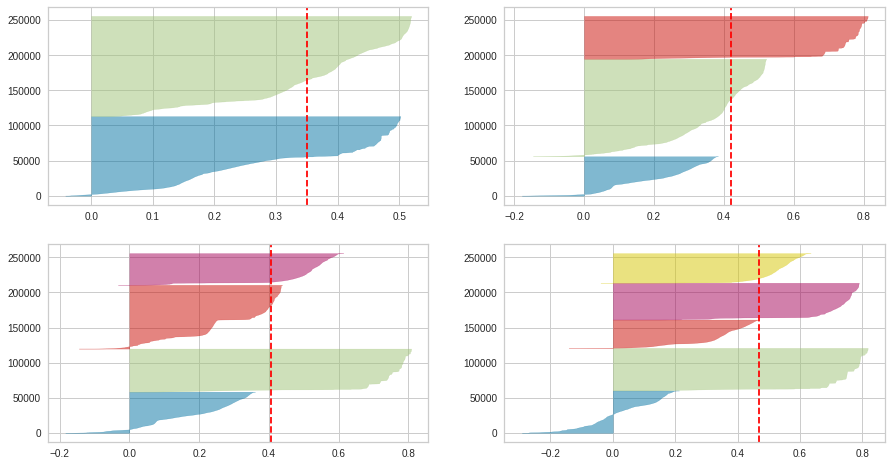

In [9]:
fig, ax = plt.subplots (2, 2, figsize = (15,8))
for i in [2, 3, 4, 5]:
    '''
    Crie uma instância KMeans para um número diferente de clusters
    '''
    km = KMeans (n_clusters = i, init = 'k-means++', n_init = 10, max_iter = 100, random_state = 42)
    q, mod = divmod (i, 2)
    '''
    Criar instância SilhouetteVisualizer com instância KMeans
    Ajustar o visualizador
    '''
    visualizer = SilhouetteVisualizer (km, colors = 'yellowbrick', ax = ax [q-1] [mod])
    visualizer.fit (attack_normalized)

### K-Means com K determinado por Silhouette

In [10]:
kmeanModel = KMeans(n_clusters=5)
kmeanModel.fit(attack_normalized)

KMeans(n_clusters=5)

In [17]:
attack_normalized.shape

(225711, 78)